## Week7 LinearRegression

In week 7, we've covered:
* Basic machine learning concepts and workflow
* Linear regression
  
  
In this notebook,  we will work on the Boston housing dataset and build a linear regression model to predict value of houses. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represents aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.  
  
  
A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.  
  
  
Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO** statement and "____"
.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Upload **Week7_LinearRegression_Homework.ipynb** and **housing.csv** to Google Drive.

In [1]:
# Mount your Google Drive on your runtime using an authorization code
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

**TODO**: Replace **`YourFolderName`**  below with the folder name on your google drive where you put the `housing.csv` file. Run the cell, check if `housing.csv` is listed.

In [2]:
!ls /content/drive/My\ Drive/Data

housing.csv


----
## 1. Import Libraries
Import pandas, numpy, matplotlib and seaborn. Then set %matplotlib inline.

In [2]:
# TODO  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---
## 2. Load Data
Read in the housing.csv file as a DataFrame called `data`.

In [6]:
# TODO Replace YourFolderName with the folder name on your google drive

data = pd.read_csv('/content/drive/My Drive/YourFolderName/housing.csv')


# Success
print("Boston housing dataset has {} data points with {} columns.".format(*data.shape))

Boston housing dataset has 489 data points with 4 columns.


---
## 3. Explore Data

Familiarizing ourself with the data through an explorative process is a fundamental practice to help us better understand and justify our results.

In [7]:
# TODO Get the first n rows of data
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [8]:
# TODO Get a summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [9]:
# TODO Calculate descriptive statistics 
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**.  
  

The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point.   
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.   
  
The **target variable**, `'MEDV'`, will be the variable we seek to predict.  

In [19]:
# TODO Declare `features` and `target` variables

target = data["MEDV"]
features = data.drop("MEDV", axis=1)

In [15]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [16]:
target.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

Calculate Statistics
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`.
- Store each calculation in their respective variable.
- Use `numpy` to perform the necessary calcualtions.

In [17]:
# TODO: Minimum price of the data
minimum_price = round(np.min(target), 2)

# TODO: Maximum price of the data
maximum_price = round(np.max(target), 2)

# TODO: Mean price of the data
mean_price = round(np.mean(target), 2)

# TODO: Median price of the data
median_price = round(np.median(target), 2)

# TODO: Standard deviation of prices of the data
std_price = round(np.std(target), 2)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.94
Median price $438900.0
Standard deviation of prices: $165171.13


Observe features

For each of the three features **RM**, **LSTAT**, **PTRATIO**:
  * Do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? 
  * Show the data using appropriate plot and justify your answer for each.

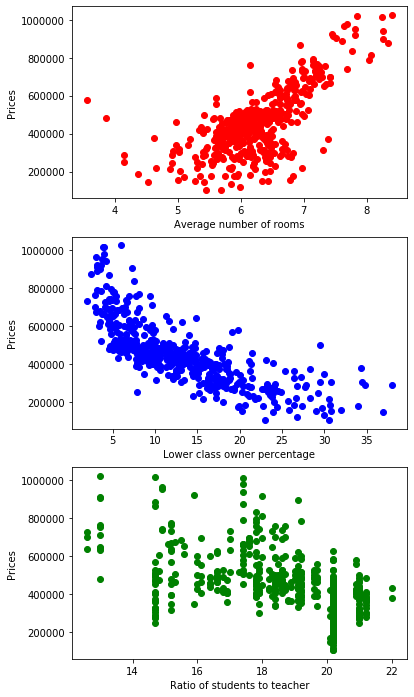

In [18]:
# TODO  
plt.figure(1, figsize=(6,12))

plt.subplot(311)
plt.plot(data['RM'], target, 'ro');
plt.xlabel('Average number of rooms')
plt.ylabel('Prices')

plt.subplot(312)
plt.plot(data['LSTAT'], target, 'bo')
plt.xlabel('Lower class owner percentage')
plt.ylabel('Prices')

plt.subplot(313)
plt.plot(data['PTRATIO'], target, 'go')
plt.xlabel('Ratio of students to teacher')
plt.ylabel('Prices');

**Answer**:    TODO  
Overall, we could see there is a trend that increasing in the average number of rooms would lead to prices climbing, while increasing in the lower class owner percentage would lead to prices dropping. Though the linear relationship between the ratio of students to teachers and prices is not as well aligned as in the second plot, it is still fair to say that generally increasig of ratio would lead to decreasing of prices. 

----

## 4. Develop Model

Split data to get training and testing Data.

In [20]:
# TODO
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split train and test (test_size=0.2, random_state=99)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Why should we perform feature scailing?

**Answer**:    TODO 
Feature scaling is essential for machine learning algorithms that calculate distances between data. It helps to weigh all the features equally.

Create linear regression object

In [21]:
# TODO 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Train/fit **lm** on the training data.

In [22]:
# TODO  
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Display a dataframe with the features and their corresponding coefficients in descending order. Think about how would you interprete the results here.

In [28]:
# TODO
coef_df = pd.DataFrame({"Feature": features.columns, "Coefficient": lm.coef_}, 
                       columns=["Feature", "Coefficient"])

coef_df.sort_values("Coefficient", ascending = 0)


,Feature,Coefficient
0,RM,50425.711295
2,PTRATIO,-46441.152893
1,LSTAT,-81465.834489


## 5. Make Prediction

Now we have a trained model, let's make some predictions and evaluate the model's performance.

Use **lm.predict( )** to predict house prices for **X_test** data set.

In [29]:
# TODO
y_pred = lm.predict(X_test)

Create a scatterplot of **y_test** versus the predicted values.

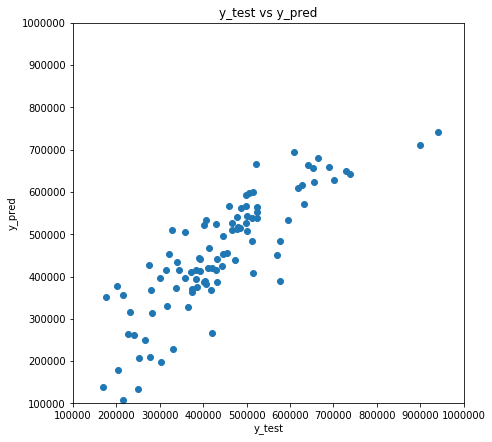

In [30]:
# TODO
plt.figure(figsize=[7, 7])
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xlim([100000, 1000000])
plt.ylim([100000, 1000000])
plt.title("y_test vs y_pred")
plt.show()

## 6. Evaluate Model

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. 

Let's evaluate the model performance by calculating the Adjusted $R^2$.  

What's the benefit of using Adjusted $R^2$ versus $R^2$?

**Answer**:    TODO 

Like the R-squared, the adjusted R-squared measures how well your model fits the data. However, it penalizes the use of variables that are meaningless for the regression. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.

Now calculate Adjusted $R^2$ for train set and test set. Hint: $R^2_{adj.}=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [34]:
# TODO  
r2 = lm.score(X_train,y_train)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))

print("Train Adjusted R^2: {}".format(adj_r2))

r2 = lm.score(X_test,y_test)
adj_r2 = (1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)))
print("Test Adjusted R^2: {}".format(adj_r2))

Train Adjusted R^2: 0.7211545521906912
Test Adjusted R^2: 0.661879060071581


## THE END, WELL DONE!

## Submission

Download completed **Week7_LinearRegression_Homework.ipynb** from Google Colab and commit to your personal Github repo you shared with the faculty.